## Построение кубического сплайна

Вариант 18
$$X^{*} = 3.0$$

$$x_{i} = 0.0, 1.7, 3.4, 5.1, 6.8 $$

$$f_{i} = 0.0, 3.0038, 5.2439, 7.3583, 9.4077$$

для $$i = 0, 1, 2, 3, 4$$ соответственно

In [75]:
x_arr = [0.0, 1.7, 3.4, 5.1, 6.8]
y_arr = [0.0, 3.0038, 5.2439, 7.3583, 9.4077]

h = [x_arr[i] - x_arr[i-1] for i in range(1, len(x_arr))]

Запишем СЛАУ для коэффициента c:

$\begin{equation}
    \begin{cases}
      6.8c_{2} + 1.7c_{3}  = -1.3477\\
      1.7c_{2} + 6.8c_{3} + 1.7c_{4} = -0.2218\\
      1.7c_{3} + 6.8c_{4} = -0.1147
    \end{cases}\,.
\end{equation}$

In [76]:
import numpy as np

C = np.array([6.8, 1.7, 0, 1.7, 6.8, 1.7, 0, 1.7, 6.8])
C = C.reshape((3, 3))

d = np.array([-1.3477, -0.2218, -0.1147])


Решим трёхдиагональную систему методом прогонки, используя функцию, написанную во 2 задании 1-ой лабораторной работы. 

In [77]:
def progonka(A, d):
    N = A.shape[0]
    A1 = A.copy()
    x = np.zeros(N)
    Q = np.zeros(N)
    P = np.zeros(N)
    P[0] = -(A1[0, 1])/(A1[0, 0]) #прямой ход: вычисляем прогоночные коэффициенты
    Q[0] = d[0] / A1[0, 0] #отдельно для первого и последнего уравнений, циклом для всех остальных
    for i in range(1, N-1):
        P[i] = - (A1[i, i+1]) / (A1[i, i] + A1[i, i-1] * P[i-1]) 
        Q[i] = (d[i] - A1[i, i-1] * Q[i-1]) / (A1[i, i] + A1[i, i-1] * P[i-1])
    P[-1] = 0
    Q[-1] = (d[-1] - A1[-1, -2] * Q[-2]) / (A1[-1, -1] + A1[-1, -2] * P[-2])
    #print("P: ", P)
    #print("Q: ", Q)
    
    x[N-1] = Q[N-1] #обратный ход, вычисляем переменные начиная с последнего уравнения (его считаем отдельно)
    for j in range(N-2, -1, -1): 
        x[j] = P[j] * x[j+1] + Q[j]
    return x

In [78]:
cx = progonka(C, d)
cx 

array([-0.20423319,  0.02416807, -0.02290966])

Остальные коэффициенты вычислим по формулам:
$$ a_{i} = f_{i-1}, i = 1,2,3$$

$$ b_{i} = \frac{f_{i} - f_{i-1}}{h_{i}} - \frac{1}{3}h_{i}(c_{i+1}+2c_{i}), i = 1,2$$

$$ d_{i} = \frac{c_{i+1} - c_{i}}{3h_{i}}, i = 1,2$$

$$c_{1} = 0\\    b_{4} = \frac{f_{4} - f{3}}{h_{4}} - \frac{2}{3}h_{4}c_{4}, \\  d_{4} = -\frac{c_{4}}{3h_{4}}$$

In [79]:
a = [0.0, 3.0038, 5.2439, 7.3583]
b = [1.8827, 1.5355, 1.2294, 1.2315]
c = [0, -0.20423319,  0.02416807, -0.02290966]
d = [-0.0401, 0.0447, -0.0092, 0.0044]

In [80]:
def cubic_spline(x, a, b, c, d, xval):
    n = len(x)
    for i in range(n-1):
        if x[i] <= xval and xval <= x[i+1]:
            return a[i] + b[i]*(xval - x[i]) + c[i]*((xval - x[i])**2) + d[i]*((xval - x[i])**3)
    

Проверка в точках с заданными значениями функции:

In [81]:
for i in range(5):
    yval = cubic_spline(x_arr, a, b, c, d, x_arr[i])
    print("Получили " +str(yval), ", на самом деле: " +str(y_arr[i]))

Получили 0.0 , на самом деле: 0.0
Получили 3.0035787000000003 , на самом деле: 3.0038
Получили 5.2435271809 , на самом деле: 5.2439
Получили 7.3585261223 , на самом деле: 7.3583
Получили 9.407258282599999 , на самом деле: 9.4077


Вычислим значение функции в точке $x = X^{*}$


In [82]:
y_star = cubic_spline(x_arr, a, b, c, d, 3.0)
print(y_star)

4.7530018089


Построим график полученного сплайна:

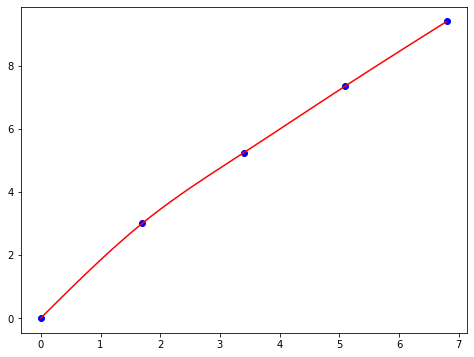

In [83]:
import matplotlib.pyplot as plt

x_f = np.arange(0.0, 6.8, 0.01)
y_f = [cubic_spline(x_arr, a, b, c, d, x_fi) for x_fi in x_f]

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_f, y_f, color = 'red')
ax.scatter(x_arr, y_arr, color = 'blue')